In [1]:
import sys
import os

import open3d as o3d
import numpy as np

sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))
import limbs3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Read Point Cloud data

In [2]:
#input_dir="./data/"
input_dir="../../Lymphedema/ScanData/bydate/"
filename="date10.ply"

pcd = o3d.io.read_point_cloud(os.path.join(input_dir,filename))

In [ ]:
o3d.visualization.draw_geometries([pcd])
#o3d.visualization.draw_plotly([pcd],point_sample_factor=0.1)

### Pre-preperation
1. Divide the legs into left and right and focus on analyzing the data from the left leg.
2. Detect the floor surface using RANSAC and align it with the XY plane.
3. Remove any erroneously measured data that appears inside the legs.
4. Remove the floor.
   1. Detect and remove the floor surface using RANSAC.
   2. Remove points that are less than 5mm from the detected floor surface.
   3. Remove any clusters identified by DBSCAN that are not part of the main cluster.

In [4]:
l_cropped,r_cropped = limbs3d.separate2legs(pcd,vis=False)

pcd_tmp=limbs3d.align2Floor(l_cropped)

pcd_tmp = limbs3d.removeHiddenPoints(pcd_tmp,dx=50,vis=False)

pcd_tmp=limbs3d.deleteFloor(pcd_tmp,vis=False,distance_threshold=5)
pcd_tmp=pcd_tmp.select_by_index(np.where(np.asarray(pcd_tmp.points)[:,0] >=5)[0])

pcd_tmp=limbs3d.getMainClusterDBSCAN(pcd_tmp,eps=5, min_points=5, print_progress=True,vis=False)

l_pcd=limbs3d.centerYZ(pcd_tmp)
l_mesh=limbs3d.get_surface(l_pcd,auto_normals=True)

Plane equation: 0.99x + -0.11y + 0.00z + 207.78 = 0
Plane equation: 1.00x + -0.00y + 0.00z + 0.01 = 0
Plane equation: 1.00x + -0.01y + 0.01z + 0.11 = 0
Plane equation: 1.00x + 0.01y + 0.00z + -0.61 = 0
[Open3D DEBUG] Input Points / Samples: 259364 / 41830
[Open3D DEBUG] #   Got kernel density: 0.122 (s), 418.309 (MB) / 418.309 (MB) / 1584 (MB)
[Open3D DEBUG] #     Got normal field: 0.439 (s), 542.574 (MB) / 542.574 (MB) / 1584 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 2.839912e-06 / 7.365710e-01
[Open3D DEBUG] #       Finalized tree: 0.716 (s), 683.609 (MB) / 683.609 (MB) / 1584 (MB)
[Open3D DEBUG] #  Set FEM constraints: 1.00500 (s), 617.375 (MB) / 683.609 (MB) / 1584 (MB)
[Open3D DEBUG] #Set point constraints: 0.237 (s), 612.852 (MB) / 683.609 (MB) / 1584 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 2972453 / 3370096 / 26993
[Open3D DEBUG] Memory Usage: 612.852 MB
[Open3D DEBUG] # Linear system solved: 2.146 (s), 669.16 (MB) / 683.609 (MB) / 1584 (MB)
[Open3D

In [ ]:
o3d.visualization.draw_geometries([l_mesh])
#o3d.visualization.draw_plotly([l_mesh])

### Get perimeter of given HEIGHT

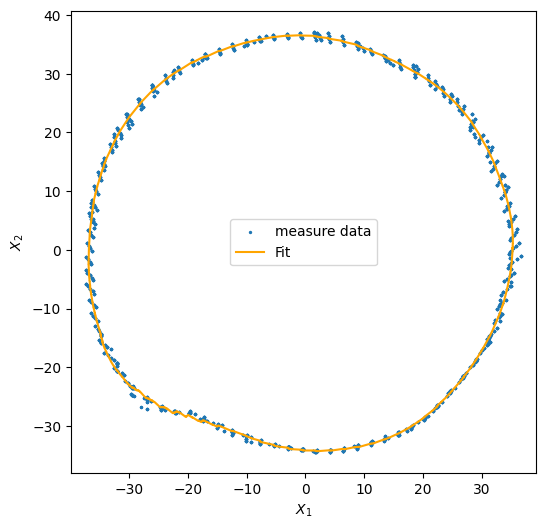

perimeter is 23.69 cm


In [6]:
height=200
peri= limbs3d.perimeter_by_savgol(l_pcd,length=height,window=10,graph=True)
print(f"perimeter is {peri/10:.2f} cm")

### Get the volume from BOTTOM to TOP

In [7]:
top=250
bottom=150

l_mesh_parts=limbs3d.crop_between_top_and_bottom(l_mesh,top=top,bottom=bottom,vis=False)
vol=limbs3d.get_vol(limbs3d.get_fix(l_mesh_parts))
print(f"volume is {vol/1000:.2f} cm^3")

Patching holes...
Patched 4 holes
Fixing degeneracies and intersections
volume is 417.49 cm^3
